Files already downloaded and verified
Files already downloaded and verified
Original image:


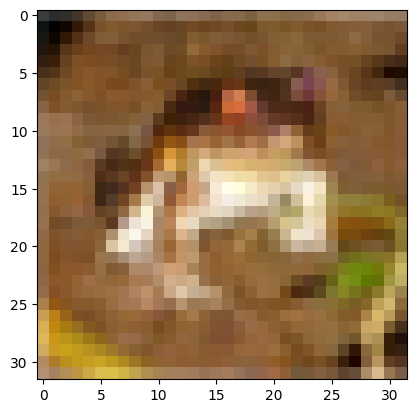

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Noised image:


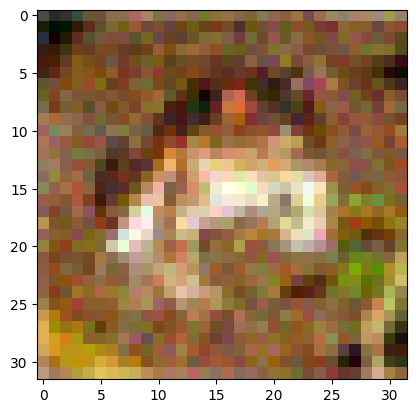

In [13]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, Normalize, ToTensor
import numpy as np
import matplotlib.pyplot as plt

# Define custom noise transform function
class AddGaussianNoise(object):
    def __init__(self, mean=0.0, std=0.1):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        return tensor + noise

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Load CIFAR-10 dataset
trainset = CIFAR10("./data", train=True, download=True, transform=None)
testset = CIFAR10("./data", train=False, download=True, transform=None)

# Get the first image from the dataset
image, _ = trainset[0]

# Define transformations
trf_no_noise = Compose([ToTensor(), Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trf_with_noise = Compose([ToTensor(), Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), AddGaussianNoise()])

# Apply transformations
image_no_noise = trf_no_noise(image)
image_with_noise = trf_with_noise(image)

# Display the original image
print("Original image:")
imshow(image_no_noise)

# Display the noised image
print("Noised image:")
imshow(image_with_noise)
